# Setup

A strategy that trades two assets on a simple Fast and Slow Moving Average crossover

In [1]:
from backtester.data_handler import DataHandler
from backtester.backtester import Backtester
from backtester.strategies import Strategy

symbol = "AAPL,MSFT"
start_date = "2023-01-01"
end_date = "2023-12-31"

# Backtesting

Final Portfolio Value: 11804.58
Total Return: 18.05%
Annualized Return: 18.20%
Annualized Volatility: 13.06%
Sharpe Ratio: 1.39
Sortino Ratio: 2.06
Maximum Drawdown: -12.07%


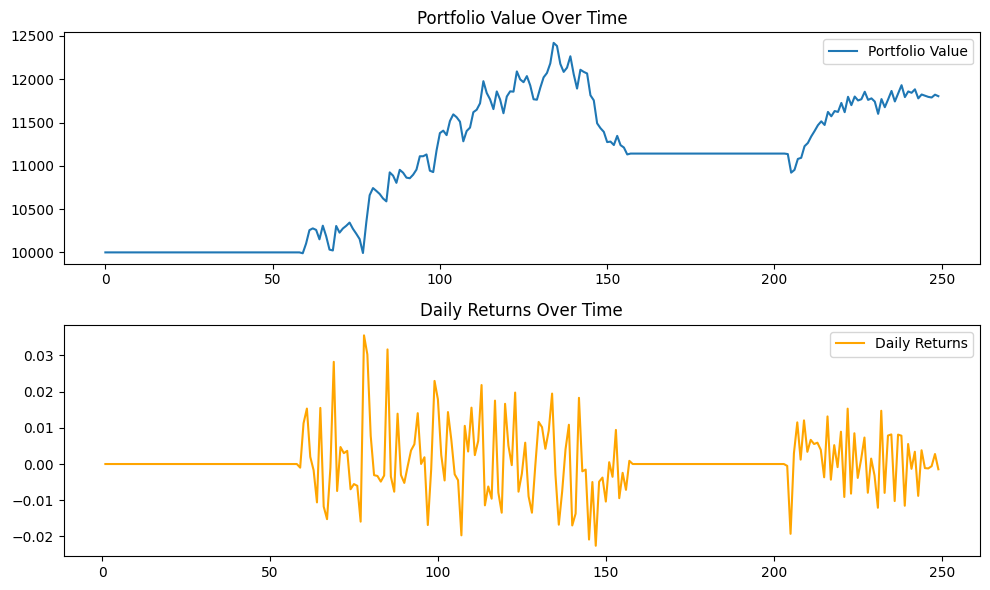

In [2]:
data = DataHandler(symbol=symbol, start_date=start_date, end_date=end_date).load_data()

# Define your strategy, indicators, and signal logic here
strategy = Strategy(
    indicators={
        "sma_20": lambda row: row["close"].rolling(window=20).mean(),
        "sma_60": lambda row: row["close"].rolling(window=60).mean(),
    },
    signal_logic=lambda row: 1 if row["sma_20"] > row["sma_60"] else -1,
)
data = strategy.generate_signals(data)

backtester = Backtester()
backtester.backtest(data)
backtester.calculate_performance()